<a href="https://colab.research.google.com/github/prashantmane091318/Computer_Vision/blob/main/Traffic_signal_prediction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file1_test="/content/drive/My Drive/Dataset/test.p"
file2_valid="/content/drive/My Drive/Dataset/valid.p"
file3_train="/content/drive/My Drive/Dataset/train.p"

In [ ]:
import pickle

In [ ]:
f_test=open(file1_test,"rb")

In [ ]:
f_valid=open(file2_valid,"rb")

In [ ]:
f_train=open(file3_train,"rb")

In [ ]:
df_test=pickle.load(f_test)

In [ ]:
df_valid=pickle.load(f_valid)

In [ ]:
df_train=pickle.load(f_train)

In [ ]:
df_test

{'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8), 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ...,
          [115, 137, 169],
          [116, 136, 168],
          [118, 139, 172]],
 
         [[116, 136, 166],
          [114, 134, 168],
     

In [ ]:
df_test.keys()

dict_keys(['sizes', 'coords', 'features', 'labels'])

In [ ]:
xtest,ytest=df_test["features"],df_test["labels"]

In [ ]:
xtest.shape,ytest.shape

((12630, 32, 32, 3), (12630,))

In [ ]:
ytest

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [ ]:
xvalid,yvalid=df_valid["features"],df_valid["labels"]

In [ ]:
xvalid.shape,yvalid.shape

((4410, 32, 32, 3), (4410,))

In [ ]:
yvalid

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [ ]:
xtrain,ytrain=df_train["features"],df_train["labels"]

In [ ]:
xtrain.shape,ytrain.shape

((34799, 32, 32, 3), (34799,))

In [ ]:
ytrain

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [ ]:
xtrain=xtrain/255.0

In [ ]:
xvalid=xvalid/255.0

In [ ]:
xtest=xtest/255.0

In [ ]:
import tensorflow as tf

In [ ]:
ytrain1=tf.keras.utils.to_categorical(ytrain)

In [ ]:
ytrain1.shape

(34799, 43)

In [ ]:
ytrain1[:1,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
yvalid1=tf.keras.utils.to_categorical(yvalid)

In [ ]:
yvalid1.shape

(4410, 43)

In [ ]:
yvalid1[:1,::]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
ytest1=tf.keras.utils.to_categorical(ytest)

In [ ]:
ytest1.shape

(12630, 43)

In [ ]:
ytest1[:1,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

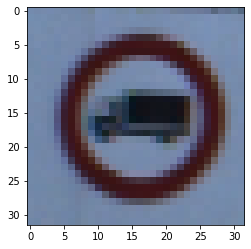

In [ ]:
plt.imshow(xtest[0])

In [ ]:
ytest[0]

16

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential()

In [ ]:
model.add(Conv2D(32,(5,5),activation="relu",input_shape=(32,32,3)))

In [ ]:
model.add(MaxPool2D((2,2)))

In [ ]:
model.add(Conv2D(32,(5,5),activation="relu"))

In [ ]:
model.add(MaxPool2D(2,2))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
Total params: 28,064
Trainable params: 28,064
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(50,activation="relu"))

In [ ]:
model.add(Dense(43,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                40050     
_________________________________________________________________
dense_1 (Dense)              (None, 43)                2

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(xtrain,ytrain1,batch_size=32,epochs=50,validation_data=(xvalid,yvalid1))

Epoch 1/50
1088/1088 [==============================] - 7s 7ms/step - loss: 1.0241 - accuracy: 0.7409 - val_loss: 0.4357 - val_accuracy: 0.8896
Epoch 2/50
1088/1088 [==============================] - 7s 7ms/step - loss: 0.1847 - accuracy: 0.9532 - val_loss: 0.3377 - val_accuracy: 0.9043
Epoch 3/50
1088/1088 [==============================] - 7s 7ms/step - loss: 0.0980 - accuracy: 0.9753 - val_loss: 0.3045 - val_accuracy: 0.9290
Epoch 4/50
1088/1088 [==============================] - 7s 7ms/step - loss: 0.0635 - accuracy: 0.9834 - val_loss: 0.2761 - val_accuracy: 0.9263
Epoch 5/50
1088/1088 [==============================] - 7s 7ms/step - loss: 0.0453 - accuracy: 0.9874 - val_loss: 0.2600 - val_accuracy: 0.9388
Epoch 6/50
1088/1088 [==============================] - 7s 7ms/step - loss: 0.0389 - accuracy: 0.9891 - val_loss: 0.2743 - val_accuracy: 0.9340
Epoch 7/50
1088/1088 [==============================] - 7s 7ms/step - loss: 0.0315 - accuracy: 0.9915 - val_loss: 0.3072 - val_accuracy:

In [ ]:
model.evaluate(xtest,ytest1)

395/395 [==============================] - 2s 4ms/step - loss: 0.8312 - accuracy: 0.9475


[0.8312071561813354, 0.9475059509277344]

In [ ]:
ytest_predict=model.predict_classes(xtest)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
ytest_predict

array([16,  1, 38, ..., 32,  7, 10])

In [ ]:
ytest

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [ ]:
import cv2

In [ ]:
imag=cv2.imread("/content/drive/My Drive/Dataset/output_30_4.png")

In [ ]:
imag=imag/255.0

In [ ]:
imag=cv2.resize(imag,(32,32))

In [ ]:
imag=cv2.cvtColor(imag, cv2.COLOR_RGB2GRAY)

In [ ]:
imag=cv2.cvtColor(imag, cv2.COLOR_GRAY2RGB)

In [ ]:
imag.shape

(32, 32, 3)

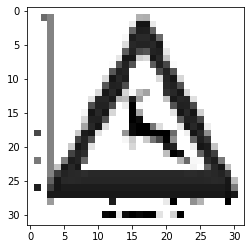

In [ ]:
plt.imshow(imag)

In [ ]:
model.predict_classes(imag.reshape(1,32,32,3))

array([23])

In [ ]:
model_json=model.to_json()

In [ ]:
model11=open("traffic_model.json","w")

In [ ]:
model11.write(model_json)

2823

In [ ]:
model.save_weights("traffic_model.h5")


In [ ]:
from tensorflow.keras.models import model_from_json

In [ ]:
modell12=open("/content/traffic_model.json","r")

In [ ]:
model13=modell12.read()

In [ ]:
modell12.close()

In [ ]:
json_file = open('/content/traffic_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [ ]:
loaded_model.evaluate(xtest,ytest1)

RuntimeError: ignored

In [ ]:
loaded_model.load_weights("traffic_model.h5")

In [ ]:
model.save("/content/drive/My Drive/Dataset/data/traffic.h5")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_load=load_model("/content/drive/My Drive/Dataset/data/traffic.h5")

In [ ]:
model_load.evaluate(xtest,ytest1)

395/395 [==============================] - 2s 4ms/step - loss: 0.8312 - accuracy: 0.9475


[0.8312071561813354, 0.9475059509277344]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
id=ImageDataGenerator(rescale=255.0)

In [ ]:
import os

In [ ]:
ll=os.listdir("/content/drive/My Drive/Dataset/data")

In [ ]:
ll.remove('.ipynb_checkpoints')

In [ ]:
ll

['output_30_17.png',
 'output_30_35.png',
 'output_30_31.png',
 '.ipynb_checkpoints',
 'traffic.h5',
 'bicycle29.jpg',
 'pedestrian22.jpg']

In [ ]:
ll.remove("traffic.h5")

In [ ]:
import pandas as pd
data=pd.DataFrame({"Features":ll})

In [ ]:
data

,Features
0,output_30_17.png
1,output_30_35.png
2,output_30_31.png
3,bicycle29.jpg
4,pedestrian22.jpg


In [ ]:
data1=id.flow_from_di(data,directory="/content/drive/My Drive/Dataset/data",x_col="Features",y_col=None,target_size=(32,32),class_mode=None,batch_size=32,shuffle=False)

Found 5 validated image filenames.


In [ ]:
import pandas as pd

In [ ]:
xx=next(data1)

In [ ]:
xx[0]

array([[[65025., 65025., 65025.],
        [65025., 65025., 65025.],
        [65025., 65025., 65025.],
        ...,
        [65025., 65025., 65025.],
        [65025., 65025., 65025.],
        [65025., 65025., 65025.]],

       [[65025., 65025., 65025.],
        [65025., 65025., 65025.],
        [    0.,     0.,     0.],
        ...,
        [65025., 65025., 65025.],
        [65025., 65025., 65025.],
        [65025., 65025., 65025.]],

       [[65025., 65025., 65025.],
        [65025., 65025., 65025.],
        [65025., 65025., 65025.],
        ...,
        [65025., 65025., 65025.],
        [65025., 65025., 65025.],
        [65025., 65025., 65025.]],

       ...,

       [[65025., 65025., 65025.],
        [65025., 65025., 65025.],
        [65025., 65025., 65025.],
        ...,
        [65025., 65025., 65025.],
        [65025., 65025., 65025.],
        [65025., 65025., 65025.]],

       [[65025., 65025., 65025.],
        [65025., 65025., 65025.],
        [65025., 65025., 65025.],
        .

In [ ]:
xx.shape

(5, 32, 32, 3)

In [ ]:
model_load.predict_classes(xx)

array([17, 35, 31, 29, 11])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


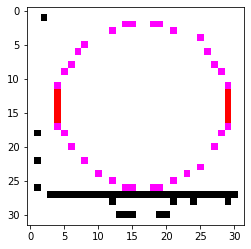

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xx[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


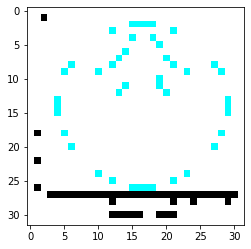

In [ ]:
plt.imshow(xx[2])